In [1]:
import bt
import talib
import pandas as pd

In [2]:
price_data=bt.get('tsla',start='2023-01-22',end='2024-04-29')

[*********************100%%**********************]  1 of 1 completed


In [3]:
price_data

,tsla
Date,
2023-01-23,143.750000
2023-01-24,143.889999
2023-01-25,144.429993
2023-01-26,160.270004
2023-01-27,177.899994
...,...
2024-04-22,142.050003
2024-04-23,144.679993
2024-04-24,162.130005


NameError: name 'stock_rsi' is not defined

In [5]:
stock_rsi=talib.RSI(price_data['tsla']).to_frame()

In [6]:
#create same dataframe structure as RSI
signal=stock_rsi.copy()
signal[stock_rsi.isnull()]=0

In [7]:
#construct the signal
signal[stock_rsi<30]=1
signal[stock_rsi>70]=-1
signal[(stock_rsi<=70)& (stock_rsi>=30)]=0

In [8]:
signal.columns=['signal']

In [9]:
(signal['signal']==-1).sum()

28

In [10]:
df=bt.merge(signal,price_data)

In [11]:
df.columns=['signal','strategy']

<Axes: xlabel='Date'>

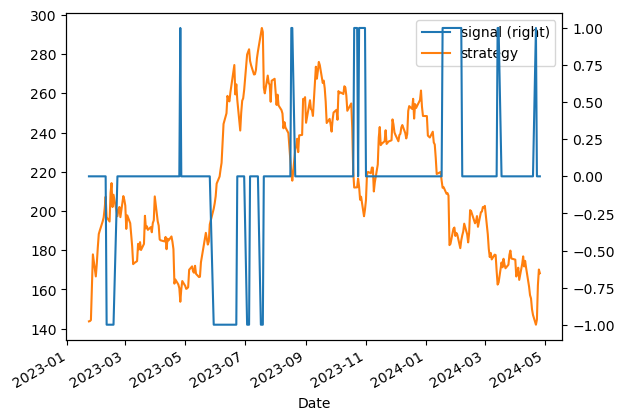

In [12]:
df.plot(secondary_y=['signal'])

In [13]:
price_data.columns=['bt_strategy']

In [14]:
signal.columns=['bt_strategy']

In [15]:
bt_strategy=bt.Strategy('RSI_MeanReversion',
                        [bt.algos.WeighTarget(signal),
                         bt.algos.Rebalance()])

In [16]:
bt_backtest=bt.Backtest(bt_strategy,price_data)

In [17]:
bt_result=bt.run(bt_backtest)

<Axes: title={'center': 'Backtest Result'}>

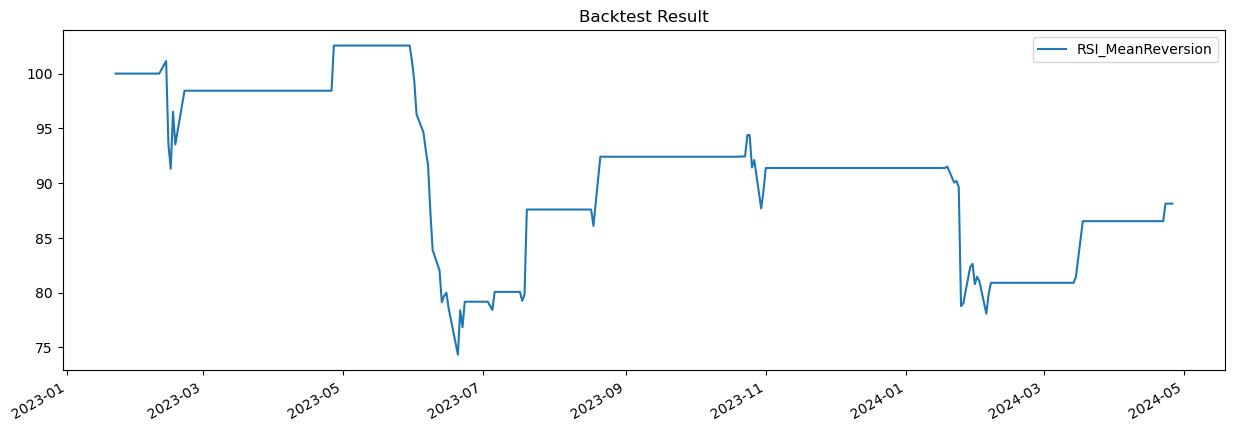

In [18]:
bt_result.plot(title='Backtest Result')

In [19]:
resInfo=bt_result.stats

In [20]:
print (resInfo.index)

Index(['start', 'end', 'rf', 'total_return', 'cagr', 'max_drawdown', 'calmar',
       'mtd', 'three_month', 'six_month', 'ytd', 'one_year', 'three_year',
       'five_year', 'ten_year', 'incep', 'daily_sharpe', 'daily_sortino',
       'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 'best_day',
       'worst_day', 'monthly_sharpe', 'monthly_sortino', 'monthly_mean',
       'monthly_vol', 'monthly_skew', 'monthly_kurt', 'best_month',
       'worst_month', 'yearly_sharpe', 'yearly_sortino', 'yearly_mean',
       'yearly_vol', 'yearly_skew', 'yearly_kurt', 'best_year', 'worst_year',
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month',
       'win_year_perc', 'twelve_month_win_perc'],
      dtype='object')


In [21]:
resInfo.index.get_loc('daily_mean')

18

In [22]:
print ('Daily return: %.4f'% float(resInfo.iloc[18]))

Daily return: -0.0704


C:\Users\Clari\AppData\Local\Temp\ipykernel_10044\1983948169.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ('Daily return: %.4f'% float(resInfo.iloc[18]))


In [23]:
print('Sharp ratio daily: %.2f'% resInfo.loc['daily_sharpe'])

Sharp ratio daily: -0.29


C:\Users\Clari\AppData\Local\Temp\ipykernel_10044\3662804259.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sharp ratio daily: %.2f'% resInfo.loc['daily_sharpe'])


In [25]:
print('Sharp ratio monthly: %.2f'% resInfo.loc['monthly_sharpe'])

Sharp ratio monthly: -0.24


C:\Users\Clari\AppData\Local\Temp\ipykernel_10044\3863799237.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sharp ratio monthly: %.2f'% resInfo.loc['monthly_sharpe'])


In [26]:
print('Sharp ratio yearly: %.2f'% resInfo.loc['yearly_sharpe'])

Sharp ratio yearly: nan


C:\Users\Clari\AppData\Local\Temp\ipykernel_10044\2994177487.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sharp ratio yearly: %.2f'% resInfo.loc['yearly_sharpe'])


In [27]:
annual_return=resInfo.loc['yearly_mean']

In [28]:
volatility=resInfo.loc['yearly_vol']

In [29]:
sharpe_ratio=annual_return/volatility

In [33]:
print('Sharpe ratio annually %.2f'% sharpe_ratio)

Sharpe ratio annually nan


C:\Users\Clari\AppData\Local\Temp\ipykernel_10044\4005020271.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Sharpe ratio annually %.2f'% sharpe_ratio)


In [34]:
print ('Sortino ratio daily:%.2f'% resInfo.loc['daily_sortino'])

Sortino ratio daily:-0.41


C:\Users\Clari\AppData\Local\Temp\ipykernel_10044\996464746.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ('Sortino ratio daily:%.2f'% resInfo.loc['daily_sortino'])


In [35]:
print ('Sortino ratio monthly:%.2f'% resInfo.loc['monthly_sortino'])

Sortino ratio monthly:-0.30


C:\Users\Clari\AppData\Local\Temp\ipykernel_10044\1578331131.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ('Sortino ratio monthly:%.2f'% resInfo.loc['monthly_sortino'])
